In [1]:
!pip install intake intake-esm xarray zarr gcsfs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.4/205.4 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.0 MB/s eta 0:00:00


In [44]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 108.2 MB/s eta 0:00:00


In [2]:
import intake
import xarray as xr

# Load the Pangeo CMIP6 cloud data catalog
col_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_catalog(col_url)

# See what experiments/models are available
print(list(col))

[]


In [3]:
import intake

col_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(col_url)

col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [4]:
import numpy as np
np.sum(col.df['activity_id']=='AerChemMIP')

np.int64(8576)

In [5]:
df_ = col.df[col.df['activity_id']=='AerChemMIP']

In [6]:
df_['source_id'].unique()

array(['GFDL-ESM4', 'CNRM-ESM2-1', 'CESM2-WACCM', 'BCC-ESM1',
       'MPI-ESM-1-2-HAM', 'MIROC6', 'UKESM1-0-LL', 'NorESM2-LM',
       'GISS-E2-1-G', 'MRI-ESM2-0', 'TaiESM1', 'EC-Earth3-AerChem'],
      dtype=object)

In [7]:
df_['experiment_id'].unique()

array(['hist-piAer', 'histSST-1950HC', 'hist-1950HC', 'histSST',
       'piClim-2xVOC', 'piClim-2xNOx', 'piClim-2xdust', 'piClim-2xss',
       'hist-piNTCF', 'histSST-piNTCF', 'histSST-piO3', 'piClim-CH4',
       'piClim-NTCF', 'piClim-NOx', 'piClim-O3', 'piClim-HC',
       'ssp370SST-lowCH4', 'piClim-VOC', 'ssp370-lowNTCF',
       'piClim-control', 'piClim-aer', 'ssp370SST-lowNTCF',
       'ssp370SST-ssp126Lu', 'ssp370SST', 'ssp370pdSST', 'histSST-piAer',
       'histSST-piCH4', 'piClim-BC', 'piClim-2xfire', 'piClim-SO2',
       'piClim-OC', 'piClim-N2O', 'piClim-2xDMS', 'ssp370'], dtype=object)

In [8]:
df_['table_id'].unique()

array(['AERmon', 'CFmon', 'Amon', 'Emon', 'fx', 'Lmon', 'day', 'LImon',
       '3hr', 'AERday', 'CFday', 'AERmonZ', 'EdayZ', 'Omon', 'EmonZ',
       'SImon'], dtype=object)

In [9]:
df_['member_id'].unique()

array(['r1i1p1f1', 'r1i1p1f2', 'r1i2p1f1', 'r2i1p1f1', 'r3i1p1f1',
       'r2i1p1f2', 'r3i1p1f2', 'r1i1p3f1', 'r5i1p1f1', 'r3i2p1f1',
       'r2i2p1f1', 'r1i1p1f4', 'r4i1p1f1'], dtype=object)

In [10]:
df_['variable_id'].unique()

array(['dryoa', 'cdnc', 'rsdcs', 'rsd', 'ps', 'zg', 'wap', 'vas', 'va',
       'uas', 'ua', 'ts', 'tauv', 'tauu', 'tasmin', 'tasmax', 'tas', 'ta',
       'rsucs', 'fFireNat', 'fLuc', 'fProductDecomp', 'fracLut', 'gppLut',
       'hflsLut', 'rsu', 'hfssLut', 'laiLut', 'loaddust', 'loadso4',
       'cSoil', 'sfcWind', 'hussLut', 'fAnthDisturb', 'ec550aer', 'co2s',
       'rlus', 'rlds', 'psl', 'prw', 'prsn', 'prc', 'pr', 'o3', 'rldscs',
       'ch4', 'mrlso', 'mrsfl', 'airmass', 'abs550aer', 'sftlf', 'sftgif',
       'aoanh', 'mrso', 'mrsos', 'prveg', 'tran', 'mrro', 'loadss', 'snw',
       'tslsi', 'areacella', 'mrsofc', 'orog', 'rlut', 'rlutcs', 'rsds',
       'co2mass', 'evspsbl', 'hcfc22global', 'hfls', 'hfss', 'hur', 'co2',
       'hurs', 'rsutcs', 'rtmt', 'sci', 'cLand', 'cldnvi', 'co23D', 'hus',
       'concdust', 'clwvi', 'clt', 'rsdscs', 'rsdt', 'rsus', 'rsuscs',
       'rsut', 'n2oglobal', 'clw', 'n2o', 'huss', 'ch4global', 'ci', 'cl',
       'cli', 'clivi', 'mc', 'mrros', 'bld

In [11]:
vars = ['rsucs', 'rsdcs', 'rsds', 'rsdscs', 'rsus', 'rsuscs', 'rlus', 'rlds', 'rldscs']

In [12]:
exps = ['piClim-aer', 'piClim-2xdust', 'piClim-control']
exps = ['piClim-2xdust']

In [ ]:
df_cnrmesm = df_[df_['source_id']=='CNRM-ESM2-1']
df_cnrmesm[df_cnrmesm['variable_id'].isin(vars)][df_cnrmesm['experiment_id'].isin(exps)]

<ipython-input-13-44ad2f598b18>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cnrmesm[df_cnrmesm['variable_id'].isin(vars)][df_cnrmesm['experiment_id'].isin(exps)]


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
54054,AerChemMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-2xdust,r1i1p1f2,Amon,rlus,gr,gs://cmip6/CMIP6/AerChemMIP/CNRM-CERFACS/CNRM-...,NaN,20190219
54055,AerChemMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-2xdust,r1i1p1f2,Amon,rlds,gr,gs://cmip6/CMIP6/AerChemMIP/CNRM-CERFACS/CNRM-...,NaN,20190219
54100,AerChemMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-2xdust,r1i1p1f2,Amon,rsus,gr,gs://cmip6/CMIP6/AerChemMIP/CNRM-CERFACS/CNRM-...,NaN,20190219
54126,AerChemMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-2xdust,r1i1p1f2,Amon,rsds,gr,gs://cmip6/CMIP6/AerChemMIP/CNRM-CERFACS/CNRM-...,NaN,20190219


In [ ]:
query = dict(
    experiment_id=["piClim-2xdust"],
    variable_id=['rsds', 'rsus', 'rlus', 'rlds'],
    source_id=['CNRM-ESM2-1'],
    table_id=['Amon'],
    member_id='r1i1p1f2'
)

cat = col.search(**query)
cat

,unique
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,1
table_id,1
variable_id,4
grid_label,1
zstore,4
dcpp_init_year,0


In [ ]:
# Load the dataset with anonymous access

dset_dict = cat.to_dataset_dict(zarr_kwargs={"consolidated": True},
                                storage_options={"token": "anon"})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [ ]:
# Pick the dataset
ds_dust = list(dset_dict.values())[0]

In [ ]:
ds_dust

<xarray.Dataset> Size: 189MB
Dimensions:         (lat: 128, lon: 256, member_id: 1, dcpp_init_year: 1,
                     time: 360, axis_nbounds: 2)
Coordinates:
  * lat             (lat) float64 1kB -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * lon             (lon) float64 2kB 0.0 1.406 2.812 ... 355.8 357.2 358.6
  * time            (time) datetime64[ns] 3kB 1850-01-16T12:00:00 ... 1879-12...
    time_bounds     (time, axis_nbounds) datetime64[ns] 6kB dask.array<chunksize=(360, 2), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f2'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: axis_nbounds
Data variables:
    rlus            (member_id, dcpp_init_year, time, lat, lon) float32 47MB dask.array<chunksize=(1, 1, 360, 128, 256), meta=np.ndarray>
    rlds            (member_id, dcpp_init_year, time, lat, lon) float32 47MB dask.array<chunksize=(1, 1, 360, 128, 256), meta=np.ndarray>
    rsus            (member_id, dcpp_init_year, time, lat, lon) float32 47MB dask.array<chunksize=(1, 1, 360, 128, 256), meta=np.ndarray>
    rsds            (member_id, dcpp_init_year, time, lat, lon) float32 47MB dask.array<chunksize=(1, 1, 360, 128, 256), meta=np.ndarray>
Attributes: (12/60)
    CMIP6_CV_version:                 cv=6.2.3.0-7-g2019642
    Conventions:                      CF-1.7 CMIP-6.2
    EXPID:                            CNRM-ESM2-1_piClim-2xdust_r1i1p1f2
    activity_id:                      AerChemMIP
    arpege_minor_version:             6.3.2
    branch_method:                    standard
    ...                               ...
    intake_esm_attrs:member_id:       r1i1p1f2
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:grid_label:      gr
    intake_esm_attrs:version:         20190219
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           AerChemMIP.CNRM-CERFACS.CNRM-ESM2-1.piC...

# Control

In [ ]:
df_ = col.df[col.df['activity_id']=='CMIP']

In [ ]:
import numpy as np
np.sum(col.df['activity_id']=='CMIP')

np.int64(134576)

In [ ]:
df_cnrmesm = df_[df_['source_id']=='CNRM-ESM2-1']
df_cnrmesm[df_cnrmesm['variable_id'].isin(vars)]

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
40633,CMIP,CNRM-CERFACS,CNRM-ESM2-1,1pctCO2,r1i1p1f2,Amon,rlds,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181018
40634,CMIP,CNRM-CERFACS,CNRM-ESM2-1,1pctCO2,r1i1p1f2,Amon,rlus,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181018
40637,CMIP,CNRM-CERFACS,CNRM-ESM2-1,1pctCO2,r1i1p1f2,Amon,rsds,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181018
40639,CMIP,CNRM-CERFACS,CNRM-ESM2-1,1pctCO2,r1i1p1f2,Amon,rsus,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181018
40753,CMIP,CNRM-CERFACS,CNRM-ESM2-1,1pctCO2,r1i1p1f2,day,rlus,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181018
...,...,...,...,...,...,...,...,...,...,...,...
441156,CMIP,CNRM-CERFACS,CNRM-ESM2-1,1pctCO2,r10i1p1f2,Amon,rsus,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200529
441218,CMIP,CNRM-CERFACS,CNRM-ESM2-1,1pctCO2,r10i1p1f2,Amon,rsds,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200529
441228,CMIP,CNRM-CERFACS,CNRM-ESM2-1,1pctCO2,r10i1p1f2,Amon,rlds,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200529
441229,CMIP,CNRM-CERFACS,CNRM-ESM2-1,1pctCO2,r10i1p1f2,Amon,rlus,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200529


In [ ]:
df_cnrmesm['experiment_id'].unique()

array(['piControl-spinup', '1pctCO2', 'esm-piControl-spinup',
       'abrupt-4xCO2', 'piControl', 'amip', 'historical', 'esm-piControl',
       'esm-hist'], dtype=object)

In [ ]:
exps = ['piClim-aer', 'piClim-2xdust', 'piClim-control']
exps = ['piControl']

In [ ]:
vars = ['rsds', 'rsus', 'rlus', 'rlds']

In [ ]:
df_cnrmesm = df_[df_['source_id']=='CNRM-ESM2-1']
df_cnrmesm[df_cnrmesm['variable_id'].isin(vars)][df_cnrmesm['experiment_id'].isin(exps)][df_cnrmesm['table_id']=='Amon']

<ipython-input-61-18eae888119e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cnrmesm[df_cnrmesm['variable_id'].isin(vars)][df_cnrmesm['experiment_id'].isin(exps)][df_cnrmesm['table_id']=='Amon']
<ipython-input-61-18eae888119e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cnrmesm[df_cnrmesm['variable_id'].isin(vars)][df_cnrmesm['experiment_id'].isin(exps)][df_cnrmesm['table_id']=='Amon']


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
42671,CMIP,CNRM-CERFACS,CNRM-ESM2-1,piControl,r1i1p1f2,Amon,rsus,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181115
42690,CMIP,CNRM-CERFACS,CNRM-ESM2-1,piControl,r1i1p1f2,Amon,rlus,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181115
42694,CMIP,CNRM-CERFACS,CNRM-ESM2-1,piControl,r1i1p1f2,Amon,rsds,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181115
42696,CMIP,CNRM-CERFACS,CNRM-ESM2-1,piControl,r1i1p1f2,Amon,rlds,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181115


In [ ]:
query = dict(
    experiment_id=["piControl"],
    variable_id=['rsds', 'rsus', 'rlus', 'rlds'],
    source_id=['CNRM-ESM2-1'],
    table_id=['Amon'],
    member_id='r1i1p1f2'
)

cat = col.search(**query)
cat

,unique
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,1
table_id,1
variable_id,4
grid_label,1
zstore,4
dcpp_init_year,0


In [ ]:
# Load the dataset with anonymous access

dset_dict = cat.to_dataset_dict(zarr_kwargs={"consolidated": True},
                                storage_options={"token": "anon"})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/usr/local/lib/python3.11/dist-packages/intake_esm/source.py:82: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  ds = xr.open_dataset(url, **xarray_open_kwargs)
/usr/local/lib/python3.11/dist-packages/intake_esm/source.py:82: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  ds = xr.open_dataset(url, **xarray_open_kwargs)
/usr/local/lib/python3.11/dist-packages/intake_esm/source.py:82: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warnin

In [ ]:
# Pick the dataset
ds_piclim = list(dset_dict.values())[0]

In [ ]:
ds_piclim

<xarray.Dataset> Size: 3GB
Dimensions:         (lat: 128, lon: 256, member_id: 1, dcpp_init_year: 1,
                     time: 6000)
Coordinates:
  * lat             (lat) float64 1kB -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * lon             (lon) float64 2kB 0.0 1.406 2.812 ... 355.8 357.2 358.6
  * time            (time) object 48kB 1850-01-16 00:00:00 ... 2349-12-16 00:...
  * member_id       (member_id) object 8B 'r1i1p1f2'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Data variables:
    rsus            (member_id, dcpp_init_year, time, lat, lon) float32 786MB dask.array<chunksize=(1, 1, 600, 128, 256), meta=np.ndarray>
    rlus            (member_id, dcpp_init_year, time, lat, lon) float32 786MB dask.array<chunksize=(1, 1, 600, 128, 256), meta=np.ndarray>
    rsds            (member_id, dcpp_init_year, time, lat, lon) float32 786MB dask.array<chunksize=(1, 1, 600, 128, 256), meta=np.ndarray>
    rlds            (member_id, dcpp_init_year, time, lat, lon) float32 786MB dask.array<chunksize=(1, 1, 600, 128, 256), meta=np.ndarray>
Attributes: (12/61)
    CMIP6_CV_version:                 cv=6.2.3.0-7-g2019642
    Conventions:                      CF-1.7 CMIP-6.2
    EXPID:                            CNRM-ESM2-1_piControl_r1i1p1f2
    activity_id:                      CMIP
    arpege_minor_version:             6.3.1
    branch_method:                    standard
    ...                               ...
    intake_esm_attrs:member_id:       r1i1p1f2
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:grid_label:      gr
    intake_esm_attrs:version:         20181115
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CNRM-CERFACS.CNRM-ESM2-1.piControl...

# Radiative forcing due to control

In [ ]:
ds_rad_piclim = (ds_piclim.rsds + ds_piclim.rlds - ds_piclim.rsus - ds_piclim.rlus).mean(dim='time').compute()
ds_rad_piclim

<xarray.DataArray (member_id: 1, dcpp_init_year: 1, lat: 128, lon: 256)> Size: 131kB
array([[[[-16.381878 , -16.381878 , -16.381878 , ..., -16.381878 ,
          -16.381878 , -16.381878 ],
         [-20.540508 , -20.540508 , -20.540508 , ..., -20.540508 ,
          -20.540508 , -20.540508 ],
         [-20.051147 , -20.051147 , -20.051147 , ..., -19.815842 ,
          -20.051147 , -20.051147 ],
         ...,
         [ -2.4818604,  -2.4818604,  -2.4818604, ...,  -3.113703 ,
           -2.4818604,  -2.4818604],
         [ -2.0296535,  -2.0296535,  -2.0296535, ...,  -2.0296535,
           -2.0296535,  -2.0296535],
         [ -6.9580455,  -6.9580455,  -6.9580455, ...,  -6.9580455,
           -6.9580455,  -6.9580455]]]], dtype=float32)
Coordinates:
  * lat             (lat) float64 1kB -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * lon             (lon) float64 2kB 0.0 1.406 2.812 ... 355.8 357.2 358.6
  * member_id       (member_id) object 8B 'r1i1p1f2'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan

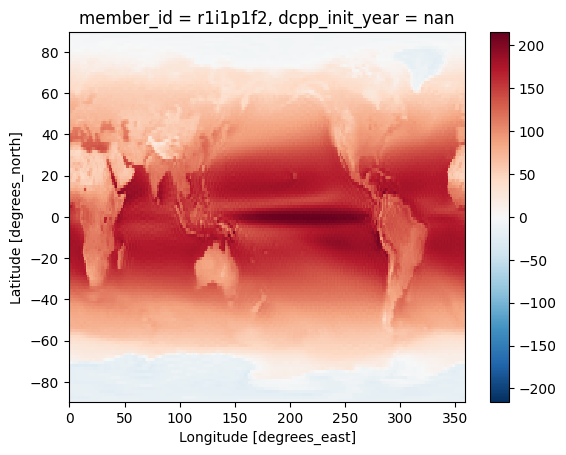

In [ ]:
ds_rad_piclim.plot()

In [ ]:
!pip install cartopy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 80.3 MB/s eta 0:00:00


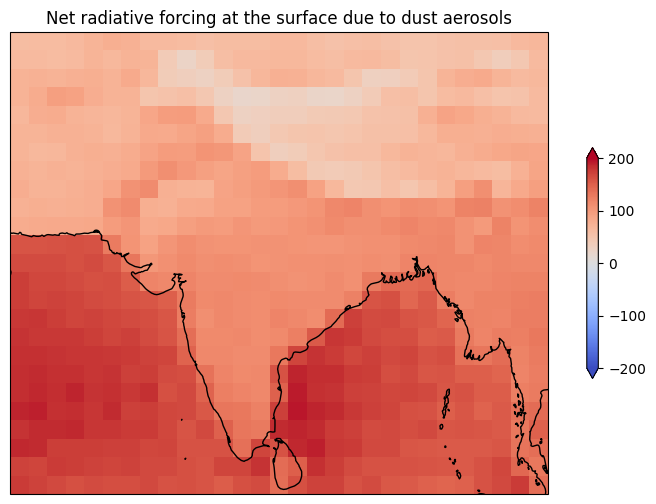

In [ ]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Assuming ds_rad_piclim is your DataArray with latitude and longitude coordinates
# and the data is georeferenced.

# Choose the variable and time slice if needed
data = ds_rad_piclim  # or ds_rad_piclim.isel(time=0)

# Set the projection
proj = ccrs.PlateCarree()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': proj})
data.sel(lon=slice(60,100)).sel(lat=slice(5,40)).plot(ax=ax, transform=proj,vmin=-200, vmax=200, cmap='coolwarm',extend='both', cbar_kwargs={'shrink': 0.5})
ax.coastlines()
# ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Net radiative forcing at the surface due to dust aerosols')

plt.show()

In [ ]:
data

<xarray.DataArray (member_id: 1, dcpp_init_year: 1, lat: 128, lon: 256)> Size: 131kB
array([[[[-16.381878 , -16.381878 , -16.381878 , ..., -16.381878 ,
          -16.381878 , -16.381878 ],
         [-20.540508 , -20.540508 , -20.540508 , ..., -20.540508 ,
          -20.540508 , -20.540508 ],
         [-20.051147 , -20.051147 , -20.051147 , ..., -19.815842 ,
          -20.051147 , -20.051147 ],
         ...,
         [ -2.4818604,  -2.4818604,  -2.4818604, ...,  -3.113703 ,
           -2.4818604,  -2.4818604],
         [ -2.0296535,  -2.0296535,  -2.0296535, ...,  -2.0296535,
           -2.0296535,  -2.0296535],
         [ -6.9580455,  -6.9580455,  -6.9580455, ...,  -6.9580455,
           -6.9580455,  -6.9580455]]]], dtype=float32)
Coordinates:
  * lat             (lat) float64 1kB -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * lon             (lon) float64 2kB 0.0 1.406 2.812 ... 355.8 357.2 358.6
  * member_id       (member_id) object 8B 'r1i1p1f2'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan

# Radiative forcing in control

In [ ]:
ds_dust_piclim = (ds_dust.rsds + ds_dust.rlds - ds_dust.rsus - ds_dust.rlus).mean(dim='time').compute()
ds_dust_piclim

<xarray.DataArray (member_id: 1, dcpp_init_year: 1, lat: 128, lon: 256)> Size: 131kB
array([[[[-16.36825  , -16.36825  , -16.36825  , ..., -16.36825  ,
          -16.36825  , -16.36825  ],
         [-20.688906 , -20.688906 , -20.688906 , ..., -20.688906 ,
          -20.688906 , -20.688906 ],
         [-19.944105 , -19.944105 , -19.944105 , ..., -19.724257 ,
          -19.944105 , -19.944105 ],
         ...,
         [ -3.0276732,  -3.0276732,  -3.0276732, ...,  -3.6959343,
           -3.0276732,  -3.0276732],
         [ -2.813423 ,  -2.813423 ,  -2.813423 , ...,  -2.813423 ,
           -2.813423 ,  -2.813423 ],
         [ -5.296227 ,  -5.296227 ,  -5.296227 , ...,  -5.296227 ,
           -5.296227 ,  -5.296227 ]]]], dtype=float32)
Coordinates:
  * lat             (lat) float64 1kB -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * lon             (lon) float64 2kB 0.0 1.406 2.812 ... 355.8 357.2 358.6
  * member_id       (member_id) object 8B 'r1i1p1f2'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan

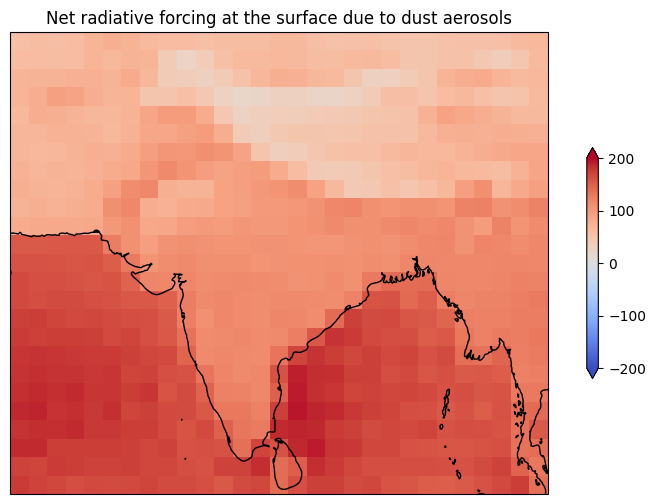

In [ ]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Assuming ds_rad_piclim is your DataArray with latitude and longitude coordinates
# and the data is georeferenced.

# Choose the variable and time slice if needed
data = ds_dust_piclim  # or ds_rad_piclim.isel(time=0)

# Set the projection
proj = ccrs.PlateCarree()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': proj})
data.sel(lon=slice(60,100)).sel(lat=slice(5,40)).plot(ax=ax, transform=proj,vmin=-200, vmax=200, cmap='coolwarm',extend='both', cbar_kwargs={'shrink': 0.5})
ax.coastlines()
# ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Net radiative forcing at the surface due to dust aerosols')

plt.show()

In [ ]:
dust_net_rad = ds_dust_piclim - ds_rad_piclim

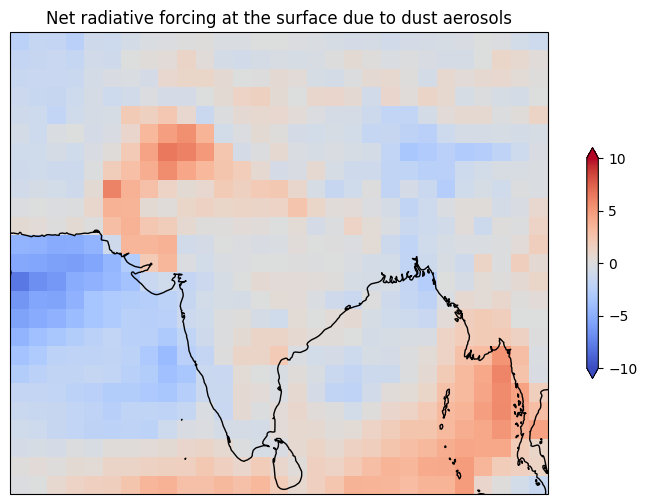

In [ ]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Assuming ds_rad_piclim is your DataArray with latitude and longitude coordinates
# and the data is georeferenced.

# Choose the variable and time slice if needed
data = dust_net_rad  # or ds_rad_piclim.isel(time=0)

# Set the projection
proj = ccrs.PlateCarree()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': proj})
data.sel(lon=slice(60,100)).sel(lat=slice(5,40)).plot(ax=ax, transform=proj,vmin=-10, vmax=10, cmap='coolwarm',extend='both', cbar_kwargs={'shrink': 0.5})
ax.coastlines()
# ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Net radiative forcing at the surface due to dust aerosols')

plt.show()

# Coupling Metrics

In [88]:
vars = ['tas', 'hfls', 'hfss', 'hus']

In [89]:
exps = ['piClim-aer', 'piClim-2xdust', 'piClim-control']

In [90]:
df_cnrmesm = df_[df_['source_id']=='CNRM-ESM2-1']
df_cnrmesm[df_cnrmesm['variable_id'].isin(vars)][df_cnrmesm['experiment_id'].isin(exps)]

<ipython-input-90-44ad2f598b18>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cnrmesm[df_cnrmesm['variable_id'].isin(vars)][df_cnrmesm['experiment_id'].isin(exps)]


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
54063,AerChemMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-2xdust,r1i1p1f2,Amon,hus,gr,gs://cmip6/CMIP6/AerChemMIP/CNRM-CERFACS/CNRM-...,NaN,20190219
54064,AerChemMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-2xdust,r1i1p1f2,Amon,hfss,gr,gs://cmip6/CMIP6/AerChemMIP/CNRM-CERFACS/CNRM-...,NaN,20190219
54066,AerChemMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-2xdust,r1i1p1f2,Amon,hfls,gr,gs://cmip6/CMIP6/AerChemMIP/CNRM-CERFACS/CNRM-...,NaN,20190219
54096,AerChemMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-2xdust,r1i1p1f2,Amon,tas,gr,gs://cmip6/CMIP6/AerChemMIP/CNRM-CERFACS/CNRM-...,NaN,20190219
54489,RFMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-aer,r1i1p1f2,Amon,hfls,gr,gs://cmip6/CMIP6/RFMIP/CNRM-CERFACS/CNRM-ESM2-...,NaN,20190219
54490,RFMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-aer,r1i1p1f2,Amon,hfss,gr,gs://cmip6/CMIP6/RFMIP/CNRM-CERFACS/CNRM-ESM2-...,NaN,20190219
54491,RFMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-aer,r1i1p1f2,Amon,hus,gr,gs://cmip6/CMIP6/RFMIP/CNRM-CERFACS/CNRM-ESM2-...,NaN,20190219
54508,RFMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-aer,r1i1p1f2,Amon,tas,gr,gs://cmip6/CMIP6/RFMIP/CNRM-CERFACS/CNRM-ESM2-...,NaN,20190219
54724,RFMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-control,r1i1p1f2,Amon,hfls,gr,gs://cmip6/CMIP6/RFMIP/CNRM-CERFACS/CNRM-ESM2-...,NaN,20190219
54725,RFMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-control,r1i1p1f2,Amon,hfss,gr,gs://cmip6/CMIP6/RFMIP/CNRM-CERFACS/CNRM-ESM2-...,NaN,20190219


In [91]:
df_ = col.df
df_[df_['source_id']=='CNRM-ESM2-1'][df_['variable_id'].isin(vars)][df_['experiment_id'].isin(exps)]

<ipython-input-91-7199656eca20>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_[df_['source_id']=='CNRM-ESM2-1'][df_['variable_id'].isin(vars)][df_['experiment_id'].isin(exps)]
<ipython-input-91-7199656eca20>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_[df_['source_id']=='CNRM-ESM2-1'][df_['variable_id'].isin(vars)][df_['experiment_id'].isin(exps)]


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
54063,AerChemMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-2xdust,r1i1p1f2,Amon,hus,gr,gs://cmip6/CMIP6/AerChemMIP/CNRM-CERFACS/CNRM-...,NaN,20190219
54064,AerChemMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-2xdust,r1i1p1f2,Amon,hfss,gr,gs://cmip6/CMIP6/AerChemMIP/CNRM-CERFACS/CNRM-...,NaN,20190219
54066,AerChemMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-2xdust,r1i1p1f2,Amon,hfls,gr,gs://cmip6/CMIP6/AerChemMIP/CNRM-CERFACS/CNRM-...,NaN,20190219
54096,AerChemMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-2xdust,r1i1p1f2,Amon,tas,gr,gs://cmip6/CMIP6/AerChemMIP/CNRM-CERFACS/CNRM-...,NaN,20190219
54489,RFMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-aer,r1i1p1f2,Amon,hfls,gr,gs://cmip6/CMIP6/RFMIP/CNRM-CERFACS/CNRM-ESM2-...,NaN,20190219
54490,RFMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-aer,r1i1p1f2,Amon,hfss,gr,gs://cmip6/CMIP6/RFMIP/CNRM-CERFACS/CNRM-ESM2-...,NaN,20190219
54491,RFMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-aer,r1i1p1f2,Amon,hus,gr,gs://cmip6/CMIP6/RFMIP/CNRM-CERFACS/CNRM-ESM2-...,NaN,20190219
54508,RFMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-aer,r1i1p1f2,Amon,tas,gr,gs://cmip6/CMIP6/RFMIP/CNRM-CERFACS/CNRM-ESM2-...,NaN,20190219
54724,RFMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-control,r1i1p1f2,Amon,hfls,gr,gs://cmip6/CMIP6/RFMIP/CNRM-CERFACS/CNRM-ESM2-...,NaN,20190219
54725,RFMIP,CNRM-CERFACS,CNRM-ESM2-1,piClim-control,r1i1p1f2,Amon,hfss,gr,gs://cmip6/CMIP6/RFMIP/CNRM-CERFACS/CNRM-ESM2-...,NaN,20190219


In [92]:
query = dict(
    experiment_id=exps,
    variable_id=vars,
    source_id=['CNRM-ESM2-1'],
    table_id=['Amon'],
    member_id='r1i1p1f2'
)

cat = col.search(**query)
cat

,unique
activity_id,2
institution_id,1
source_id,1
experiment_id,3
member_id,1
table_id,1
variable_id,4
grid_label,1
zstore,12
dcpp_init_year,0


In [93]:
# Load the dataset with anonymous access

dset_dict = cat.to_dataset_dict(zarr_kwargs={"consolidated": True},
                                storage_options={"token": "anon"})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [94]:
# Pick the dataset
ds = list(dset_dict.values())

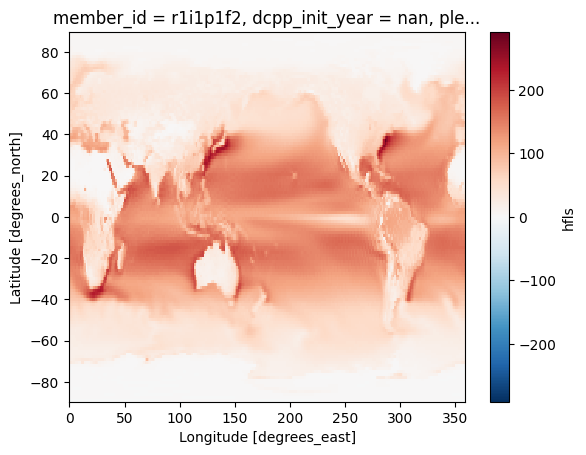

In [131]:
ds[1].isel(plev=0).hfls.mean(dim='time').plot()

In [126]:
ds_dust = ds[0].compute()
ds_control = ds[1].load()
ds_aer = ds[2].compute()

ValueError: cannot reshape array of size 41091072 into shape (33,19,128,256)

In [96]:
ds_control.tas

<xarray.DataArray 'tas' (member_id: 1, dcpp_init_year: 1, time: 360, lat: 128,
                         lon: 256)> Size: 47MB
dask.array<broadcast_to, shape=(1, 1, 360, 128, 256), dtype=float32, chunksize=(1, 1, 360, 128, 256), chunktype=numpy.ndarray>
Coordinates:
  * lat             (lat) float64 1kB -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * lon             (lon) float64 2kB 0.0 1.406 2.812 ... 355.8 357.2 358.6
  * time            (time) datetime64[ns] 3kB 1850-01-16T12:00:00 ... 1879-12...
  * member_id       (member_id) object 8B 'r1i1p1f2'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
    height          float64 8B ...
Attributes:
    cell_measures:       area: areacella
    cell_methods:        area: time: mean
    description:         Near-Surface Air Temperature
    history:             none
    interval_operation:  900 s
    interval_write:      1 month
    long_name:           Near-Surface Air Temperature
    online_operation:    average
    standard_name:       air_temperature
    units:               K

In [97]:
import xarray as xr
import numpy as np

# Step 1: Drop singleton dims
tas = ds_control.tas.squeeze(['member_id', 'dcpp_init_year'])  # shape: (time, lat, lon)
hfls = ds_control.hfls.squeeze(['member_id', 'dcpp_init_year'])  # shape: (time, lat, lon)

# Step 2: Align and mask invalid values if needed
tas, hfls = xr.align(tas, hfls, join='inner')
tas = tas.where(np.isfinite(tas))
hfls = hfls.where(np.isfinite(hfls))

# Step 3: Correlation over time
correlation = xr.corr(tas, hfls, dim='time')  # shape: (lat, lon)

# Step 4: Standard deviation of tas over time
tas_std = tas.std(dim='time')  # shape: (lat, lon)

# Step 5: Multiply
tci_control = correlation * tas_std  # shape: (lat, lon)

In [98]:
import xarray as xr
import numpy as np

# Step 1: Drop singleton dims
tas = ds_dust.tas.squeeze(['member_id', 'dcpp_init_year'])  # shape: (time, lat, lon)
hfls = ds_dust.hfls.squeeze(['member_id', 'dcpp_init_year'])  # shape: (time, lat, lon)

# Step 2: Align and mask invalid values if needed
tas, hfls = xr.align(tas, hfls, join='inner')
tas = tas.where(np.isfinite(tas))
hfls = hfls.where(np.isfinite(hfls))

# Step 3: Correlation over time
correlation = xr.corr(tas, hfls, dim='time')  # shape: (lat, lon)

# Step 4: Standard deviation of tas over time
tas_std = tas.std(dim='time')  # shape: (lat, lon)

# Step 5: Multiply
tci_dust = correlation * tas_std  # shape: (lat, lon)

In [99]:
import xarray as xr
import numpy as np

# Step 1: Drop singleton dims
tas = ds_aer.tas.squeeze(['member_id', 'dcpp_init_year'])  # shape: (time, lat, lon)
hfls = ds_aer.hfls.squeeze(['member_id', 'dcpp_init_year'])  # shape: (time, lat, lon)

# Step 2: Align and mask invalid values if needed
tas, hfls = xr.align(tas, hfls, join='inner')
tas = tas.where(np.isfinite(tas))
hfls = hfls.where(np.isfinite(hfls))

# Step 3: Correlation over time
correlation = xr.corr(tas, hfls, dim='time')  # shape: (lat, lon)

# Step 4: Standard deviation of tas over time
tas_std = tas.std(dim='time')  # shape: (lat, lon)

# Step 5: Multiply
tci_aer = correlation * tas_std  # shape: (lat, lon)

In [100]:
tci_aer_anom = tci_aer - tci_control
tci_dust_anom = tci_dust - tci_control

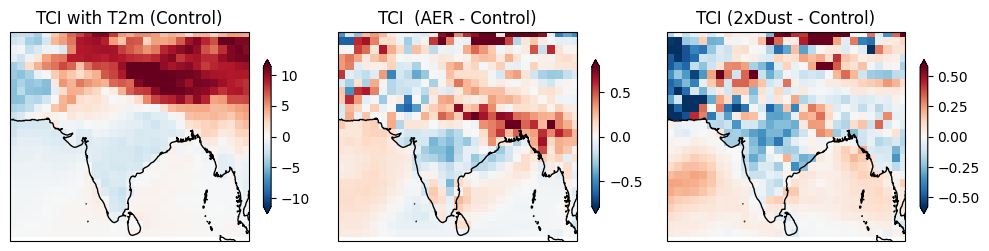

In [101]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Subset the region
lon_slice = slice(60, 100)
lat_slice = slice(5, 40)

tci_subset = tci.sel(lon=lon_slice, lat=lat_slice)
tci_aer_subset = tci_aer_anom.sel(lon=lon_slice, lat=lat_slice)
tci_dust_subset = tci_dust_anom.sel(lon=lon_slice, lat=lat_slice)

# Set up plot
fig, axes = plt.subplots(1, 3, figsize=(10, 8),
                         subplot_kw={'projection': ccrs.PlateCarree()})

datasets = [
    (tci_subset, 'TCI with T2m (Control)'),
    (tci_aer_subset, 'TCI  (AER - Control)'),
    (tci_dust_subset, 'TCI (2xDust - Control)')
]

for ax, (data, title) in zip(axes, datasets):
    im = data.plot(ax=ax, transform=ccrs.PlateCarree(),
                   cmap='RdBu_r', robust=True, cbar_kwargs={'shrink': 0.2}, extend='both')
    ax.set_title(title)
    ax.add_feature(cfeature.COASTLINE)
    ax.set_extent([60, 100, 5, 40], crs=ccrs.PlateCarree())

plt.tight_layout()
plt.show()

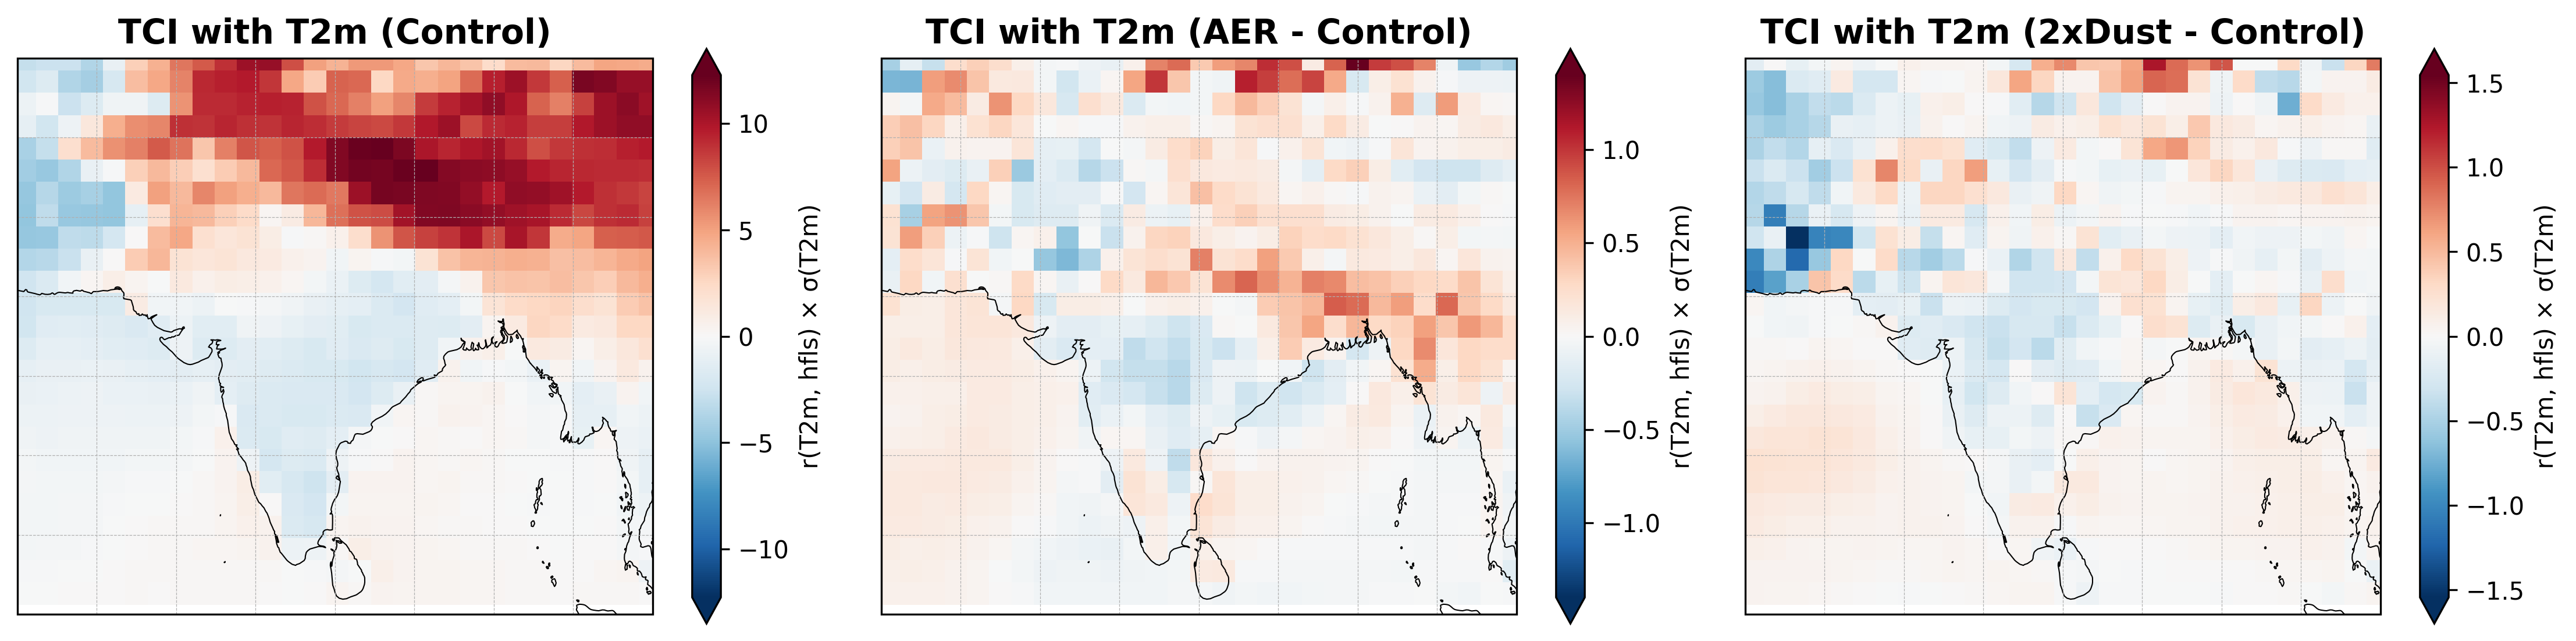

In [102]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

# Subset the region
lon_slice = slice(60, 100)
lat_slice = slice(5, 40)

tci_subset = tci.sel(lon=lon_slice, lat=lat_slice)
tci_aer_subset = tci_aer_anom.sel(lon=lon_slice, lat=lat_slice)
tci_dust_subset = tci_dust_anom.sel(lon=lon_slice, lat=lat_slice)

# Set shared color scale
vmin = xr.concat([tci_subset, tci_aer_subset, tci_dust_subset], dim='comparison').min().compute()
vmax = xr.concat([tci_subset, tci_aer_subset, tci_dust_subset], dim='comparison').max().compute()


# Set up plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=300,
                         subplot_kw={'projection': ccrs.PlateCarree()})

datasets = [
    (tci_subset, 'TCI with T2m (Control)'),
    (tci_aer_subset, 'TCI with T2m (AER - Control)'),
    (tci_dust_subset, 'TCI with T2m (2xDust - Control)')
]

for ax, (data, title) in zip(axes, datasets):
    im = data.plot(ax=ax, transform=ccrs.PlateCarree(),
                   cmap='RdBu_r',
                   cbar_kwargs={'shrink': 0.7, 'label': 'r(T2m, hfls) × σ(T2m)'},
                   extend='both')

    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.coastlines(linewidth=0.5)
    ax.set_extent([60, 100, 5, 40], crs=ccrs.PlateCarree())
    ax.gridlines(draw_labels=False, linestyle='--', linewidth=0.3)

# Final layout
plt.tight_layout()
plt.savefig("tci_comparison.png", dpi=300, bbox_inches='tight')  # Save for publication
plt.show()

#ACI

In [103]:
ds_control

<xarray.Dataset> Size: 1GB
Dimensions:         (member_id: 1, dcpp_init_year: 1, time: 360, lat: 128,
                     lon: 256, axis_nbounds: 2, plev: 19)
Coordinates:
  * lat             (lat) float64 1kB -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * lon             (lon) float64 2kB 0.0 1.406 2.812 ... 355.8 357.2 358.6
  * time            (time) datetime64[ns] 3kB 1850-01-16T12:00:00 ... 1879-12...
    time_bounds     (time, axis_nbounds) datetime64[ns] 6kB dask.array<chunksize=(360, 2), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f2'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
  * plev            (plev) float32 76B 1e+05 9.25e+04 8.5e+04 ... 500.0 100.0
    height          float64 8B ...
Dimensions without coordinates: axis_nbounds
Data variables:
    hfls            (member_id, dcpp_init_year, time, lat, lon) float32 47MB dask.array<chunksize=(1, 1, 360, 128, 256), meta=np.ndarray>
    hfss            (member_id, dcpp_init_year, time, lat, lon) float32 47MB dask.array<chunksize=(1, 1, 360, 128, 256), meta=np.ndarray>
    hus             (member_id, dcpp_init_year, time, plev, lat, lon) float32 897MB dask.array<chunksize=(1, 1, 33, 19, 128, 256), meta=np.ndarray>
    tas             (member_id, dcpp_init_year, time, lat, lon) float32 47MB dask.array<chunksize=(1, 1, 360, 128, 256), meta=np.ndarray>
Attributes: (12/61)
    CMIP6_CV_version:                 cv=6.2.3.0-7-g2019642
    Conventions:                      CF-1.7 CMIP-6.2
    EXPID:                            CNRM-ESM2-1_piClim-control_r1i1p1f2
    NCO:                              "4.5.5"
    activity_id:                      RFMIP AerChemMIP
    arpege_minor_version:             6.3.2
    ...                               ...
    intake_esm_attrs:member_id:       r1i1p1f2
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:grid_label:      gr
    intake_esm_attrs:version:         20190219
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           RFMIP.CNRM-CERFACS.CNRM-ESM2-1.piClim-c...

In [139]:
import xarray as xr
import numpy as np

# Step 1: Drop singleton dims
huss = ds_control.hus.isel(plev=0).squeeze(['member_id', 'dcpp_init_year'])  # shape: (time, lat, lon)
hfss = ds_control.hfss.squeeze(['member_id', 'dcpp_init_year'])  # shape: (time, lat, lon)

# Step 2: Align and mask invalid values if needed
huss, hfss = xr.align(huss, hfss, join='inner')
huss = huss.where(np.isfinite(huss))
hfss = hfss.where(np.isfinite(hfss))

# Step 3: Correlation over time
correlation = xr.corr(huss, hfss, dim='time')  # shape: (lat, lon)

# Step 4: Standard deviation of tas over time
huss_std = huss.std(dim='time')  # shape: (lat, lon)

# Step 5: Multiply
aci_control = correlation * huss_std  # shape: (lat, lon)

In [140]:
huss_std.values

ValueError: cannot reshape array of size 41091072 into shape (33,19,128,256)

In [141]:
correlation.values

ValueError: cannot reshape array of size 41091072 into shape (33,19,128,256)

In [107]:
import xarray as xr
import numpy as np

# Step 1: Drop singleton dims
huss = ds_dust.hus.isel(plev=0).squeeze(['member_id', 'dcpp_init_year'])  # shape: (time, lat, lon)
hfss = ds_dust.hfss.squeeze(['member_id', 'dcpp_init_year'])  # shape: (time, lat, lon)

# Step 2: Align and mask invalid values if needed
huss, hfss = xr.align(huss, hfss, join='inner')
huss = huss.where(np.isfinite(huss))
hfss = hfss.where(np.isfinite(hfss))

# Step 3: Correlation over time
correlation = xr.corr(huss, hfss, dim='time')  # shape: (lat, lon)

# Step 4: Standard deviation of tas over time
huss_std = huss.std(dim='time')  # shape: (lat, lon)

# Step 5: Multiply
aci_dust = correlation * huss_std  # shape: (lat, lon)

In [108]:
import xarray as xr
import numpy as np

# Step 1: Drop singleton dims
huss = ds_aer.hus.isel(plev=0).squeeze(['member_id', 'dcpp_init_year'])  # shape: (time, lat, lon)
hfss = ds_aer.hfss.squeeze(['member_id', 'dcpp_init_year'])  # shape: (time, lat, lon)

# Step 2: Align and mask invalid values if needed
huss, hfss = xr.align(huss, hfss, join='inner')
huss = huss.where(np.isfinite(huss))
hfss = hfss.where(np.isfinite(hfss))

# Step 3: Correlation over time
correlation = xr.corr(huss, hfss, dim='time')  # shape: (lat, lon)

# Step 4: Standard deviation of tas over time
huss_std = huss.std(dim='time')  # shape: (lat, lon)

# Step 5: Multiply
aci_aer = correlation * huss_std  # shape: (lat, lon)

In [109]:
aci_aer_anom = aci_aer - aci_control
aci_dust_anom = aci_dust - aci_control

In [113]:
aci_control

<xarray.DataArray (lat: 128, lon: 256)> Size: 131kB
dask.array<mul, shape=(128, 256), dtype=float32, chunksize=(128, 256), chunktype=numpy.ndarray>
Coordinates:
  * lat             (lat) float64 1kB -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * lon             (lon) float64 2kB 0.0 1.406 2.812 ... 355.8 357.2 358.6
    member_id       <U8 32B 'r1i1p1f2'
    dcpp_init_year  float64 8B nan
    plev            float32 4B 1e+05
    height          float64 8B 2.0

In [116]:
aci_dust_subset

<xarray.DataArray (lat: 25, lon: 29)> Size: 3kB
dask.array<getitem, shape=(25, 29), dtype=float32, chunksize=(25, 29), chunktype=numpy.ndarray>
Coordinates:
  * lat             (lat) float64 200B 6.303 7.704 9.105 ... 37.12 38.52 39.92
  * lon             (lon) float64 232B 60.47 61.88 63.28 ... 97.03 98.44 99.84
    plev            float32 4B 1e+05
    member_id       <U8 32B 'r1i1p1f2'
    dcpp_init_year  float64 8B nan
    height          float64 8B 2.0

ValueError: cannot reshape array of size 41091072 into shape (33,19,128,256)

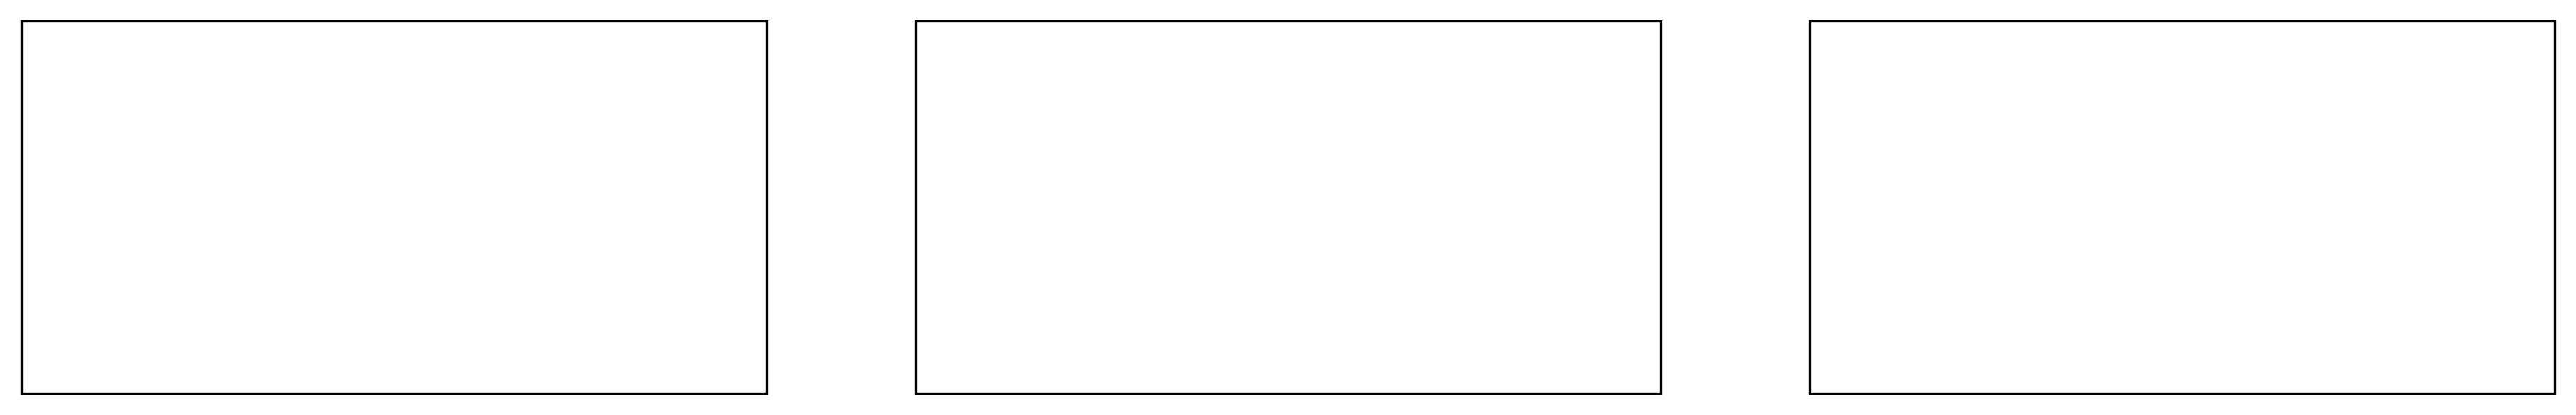

In [117]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

# Subset the region
lon_slice = slice(60, 100)
lat_slice = slice(5, 40)

aci_subset = aci_control.sel(lon=lon_slice, lat=lat_slice)
aci_aer_subset = aci_aer_anom.sel(lon=lon_slice, lat=lat_slice)
aci_dust_subset = aci_dust_anom.sel(lon=lon_slice, lat=lat_slice)


# Set up plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=300,
                         subplot_kw={'projection': ccrs.PlateCarree()})

datasets = [
    (aci_subset, 'ACI with Sensible Heat Flux (Control)'),
    (aci_aer_subset, 'ACI with Sensible Heat Flux (AER - Control)'),
    (aci_dust_subset, 'ACI with Sensible Heat Flux (2xDust - Control)')
]

for ax, (data, title) in zip(axes, datasets):
    im = data.plot(ax=ax, transform=ccrs.PlateCarree(),
                   cmap='RdBu_r',
                   cbar_kwargs={'shrink': 0.7, 'label': 'r(T2m, hfls) × σ(T2m)'},
                   extend='both')

    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.coastlines(linewidth=0.5)
    ax.set_extent([60, 100, 5, 40], crs=ccrs.PlateCarree())
    ax.gridlines(draw_labels=False, linestyle='--', linewidth=0.3)

# Final layout
plt.tight_layout()
plt.savefig("tci_comparison.png", dpi=300, bbox_inches='tight')  # Save for publication
plt.show()